In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading the csv file 
df = pd.read_csv(r'Datasets/Classified_Data.csv')
df

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [3]:
#Dropping the unwanted index column
df =df.drop(['Unnamed: 0'], axis=1)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
ls 

 Volume in drive C has no label.
 Volume Serial Number is F624-5CFE

 Directory of C:\Users\sarwa\Jupyter Notebook\Project

02-01-2023  10:41    <DIR>          .
02-01-2023  10:41    <DIR>          ..
29-12-2022  17:53    <DIR>          .ipynb_checkpoints
20-12-2022  13:05    <DIR>          50_Startups_Project
30-12-2022  15:00    <DIR>          Datasets
10-12-2022  22:04           275,559 Insurance_policy_Model.ipynb
02-01-2023  10:41            86,729 KNN_Classifier.ipynb
09-12-2022  11:05            53,129 Project_by_Sundaram.ipynb
19-12-2022  13:25    <DIR>          Sales Project
10-12-2022  22:14            10,691 Sarwar Challenge.ipynb
28-12-2022  17:00    <DIR>          Snippet Codes
21-11-2022  20:16         9,134,692 test_zo1G9sv.csv
19-12-2022  19:09           226,241 Titanic_Data_Set.ipynb
21-11-2022  20:16        13,820,236 train_qWM28Yl.csv
               7 File(s)     23,607,277 bytes
               7 Dir(s)  81,387,540,480 bytes free


In [5]:
#Checking for null values in the data
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [6]:
#Checking for Balanced and Imbalanced Dataset
df['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [7]:
#There are no null values in the data
#To implement the KNN Algorithm we need to standardize the data

In [8]:
#We need to scale the data for Independent features only, so we will drop the Target feature
df_indep = df.iloc[:,:10]
df_indep.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_indep)
scaled_features = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_features

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [10]:
#Dividing the Independent Variables and the Dependent variable
x = scaled_features
y = df['TARGET CLASS']

In [11]:
x

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [12]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

In [13]:
#Splitting the data into training data and test data
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split(x , y , train_size=0.75 , random_state=10)

# KNN Model

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train ,y_train)


KNeighborsClassifier(n_neighbors=1)

In [15]:
#Prediction

In [16]:
pred_train = knn.predict(x_train)
pred_test = knn.predict(x_test)

In [17]:
# Evaluation by using confusion matrix , classification report , accuracy score

In [18]:
from sklearn.metrics import confusion_matrix ,classification_report , accuracy_score

In [19]:
print('Training Confusion Matrix:', '\n' , confusion_matrix(y_train , pred_train))
print('Testing Confusion Matrix:', '\n',  confusion_matrix(y_test , pred_test))
      

Training Confusion Matrix: 
 [[361   0]
 [  0 389]]
Testing Confusion Matrix: 
 [[127  12]
 [  8 103]]


In [20]:
#Classification Report
print('Training:', '\n' ,classification_report(y_train , pred_train))
print('\n')
print('Testing :', '\n',classification_report(y_test , pred_test))


Training: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       361
           1       1.00      1.00      1.00       389

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



Testing : 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       139
           1       0.90      0.93      0.91       111

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [21]:
#Accuracy 
print('Training:', '\n' ,accuracy_score(y_train , pred_train))
print('Testing :', '\n',accuracy_score(y_test , pred_test))

Training: 
 1.0
Testing : 
 0.92


In [22]:
#Hyperparameter tuning---> to improve accuracy
#To find best K value using ('Elboe Method')
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train , y_train)
    pred_i =knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [23]:
print(error_rate)

[0.08, 0.08, 0.072, 0.064, 0.064, 0.064, 0.068, 0.06, 0.052, 0.068, 0.068, 0.06, 0.048, 0.048, 0.048, 0.052, 0.052, 0.06, 0.06, 0.056, 0.056, 0.056, 0.052, 0.056, 0.056, 0.052, 0.052, 0.056, 0.06, 0.056, 0.056, 0.06, 0.06, 0.056, 0.048, 0.048, 0.056, 0.056, 0.056]


Text(0.5, 1.0, 'Error Rate vs K-value')

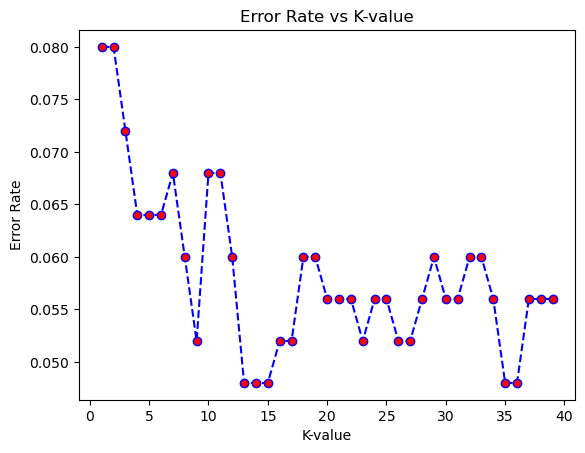

In [24]:
#Plotting the graph
# plt.figure(figsize=(16,16))
plt.plot(range(1,40), error_rate, color='blue' , linestyle='dashed' , marker = 'o' , markerfacecolor = 'red') 
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value')

In [25]:
#From the above graph we can conclude that when K-value is 39 we can get the best accuracy
# so now building the model with n_neighbors = 39 , and checking the accuracy 

In [26]:
knn = KNeighborsClassifier(n_neighbors=39)
knn.fit(x_train ,y_train)


KNeighborsClassifier(n_neighbors=39)

In [27]:
y_pred = knn.predict(x_test)

In [28]:
print(accuracy_score(y_test ,y_pred))

0.944


# Training accuracy - 100%
# Test accuracy -94.4%

In [29]:
#To further more increase the Test accuracy we can use Cross validation method

In [30]:
from sklearn.model_selection import cross_val_score
test_accuracy = cross_val_score(knn , X=x_test ,y=y_test, cv=10)
print(test_accuracy)

[1.   0.96 0.96 0.8  0.96 0.92 0.96 0.96 1.   0.92]


In [31]:
# the best test accuracy given with cross validation is 100%
print('Test Accuracy: ',test_accuracy[0])

Test Accuracy:  1.0


# Improvised Accuracy 
# Training accuracy - 100%
# Test accuracy -100%